In [142]:
# Import libraries and set size of plots
import json

import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [20, 5]

In [143]:
# Read data
dialogue_df = pd.read_csv("./data/DIALOCONAN.csv").sort_values(by="dialogue_id")
knowledge_df = pd.read_csv("./data/multitarget_KN_grounded_CN.csv")

In [144]:
# Calculate overlap between datasets
overlap_df = dialogue_df.merge(knowledge_df, how="inner", left_on="text", right_on="hate_speech", sort=True)
overlap_df.head()

,text,TARGET,dialogue_id,turn_id,type,source,hate_speech,knowledge_sentence,counter_narrative,target
0,All Muslims are incompatible with any Western ...,MUSLIMS,634,0,HS,session_1,All Muslims are incompatible with any Western ...,"The United Methodist Church, for example, form...",Why do you say that ALL Muslims are incompatib...,Islamophobia
1,All Muslims are incompatible with any Western ...,MUSLIMS,634,0,HS,session_1,All Muslims are incompatible with any Western ...,The pope criticised the growingsecularisation ...,The pope once criticised the growing secularis...,Islamophobia
2,All Muslims are incompatible with any Western ...,MUSLIMS,634,0,HS,session_1,All Muslims are incompatible with any Western ...,And that ultimately western society will alway...,Sales of luxury goods in the Middle East hit $...,Islamophobia
3,All Muslims are incompatible with any Western ...,MUSLIMS,1049,0,HS,session_1,All Muslims are incompatible with any Western ...,"The United Methodist Church, for example, form...",Why do you say that ALL Muslims are incompatib...,Islamophobia
4,All Muslims are incompatible with any Western ...,MUSLIMS,1049,0,HS,session_1,All Muslims are incompatible with any Western ...,The pope criticised the growingsecularisation ...,The pope once criticised the growing secularis...,Islamophobia


In [145]:
# Basic statistics on overlap
k_sentences = overlap_df["knowledge_sentence"].unique()
print(f"Unique knowledge sentences: {len(k_sentences)}")

k_cns = overlap_df["counter_narrative"].unique()
print(f"Unique knowledge counter-narartives: {len(k_cns)}\n")

dialogues = overlap_df["dialogue_id"].unique()
print(f"Unique dialogues with knowledge matches: {len(dialogues)}")

dialogues = overlap_df["text"].unique()
print(f"Unique utterances with knowledge matches: {len(dialogues)}")

Unique knowledge sentences: 67
Unique knowledge counter-narartives: 77

Unique dialogues with knowledge matches: 98
Unique utterances with knowledge matches: 36


In [146]:
# See how many knowledge items there are per dialogue, and on average
per_dialogue_df = overlap_df.groupby(["dialogue_id"])[["knowledge_sentence", "counter_narrative"]].nunique()
avg_k_sentences = per_dialogue_df.mean()
print(f"Average knowledge items per dialogue: {avg_k_sentences['knowledge_sentence']}")
print(f"Average knowledge based counter-narratives per dialogue: {avg_k_sentences['counter_narrative']}")

Average knowledge items per dialogue: 1.989795918367347
Average knowledge based counter-narratives per dialogue: 2.2142857142857144


In [147]:
# Check if we have more knowledge sentences than counter-narratives
more_k = per_dialogue_df[per_dialogue_df["knowledge_sentence"] > per_dialogue_df["counter_narrative"]]
less_k = per_dialogue_df[per_dialogue_df["knowledge_sentence"] < per_dialogue_df["counter_narrative"]]
equal_k = per_dialogue_df[per_dialogue_df["knowledge_sentence"] == per_dialogue_df["counter_narrative"]]

print(
    f"Cases with: more knowledge:{len(more_k)}, less knowledge: {len(less_k)}, and equal knowledge items: {len(equal_k)} compared to counter-narratives")

Cases with: more knowledge:0, less knowledge: 16, and equal knowledge items: 82 compared to counter-narratives


<Axes: xlabel='dialogue_id'>

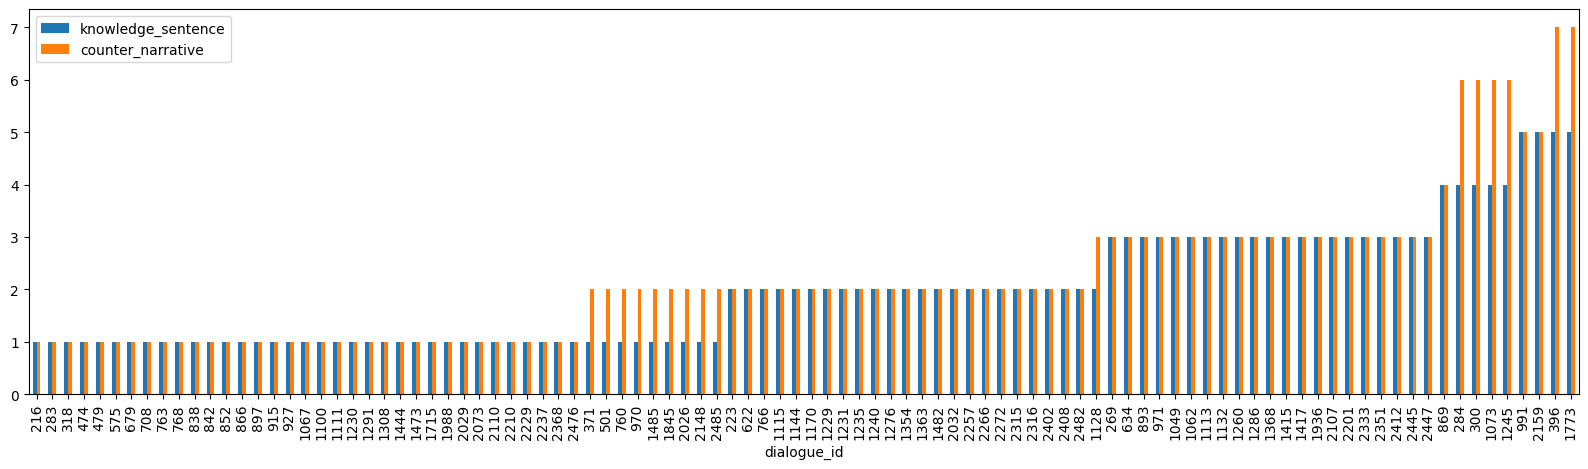

In [148]:
# Visualize distribution
per_dialogue_df.sort_values(by=["knowledge_sentence", "counter_narrative"], inplace=True)
per_dialogue_df.plot.bar()

In [149]:
# Create dataset as in DSTC: {dialogue_id}
logs = []
labels = []

dialogue_id = 0
utterances = []
for i, row in dialogue_df.iterrows():  # TODO bug on first dialogue
    # determine if we are in a new dialogue. if so, add the last one to the logs
    if row["dialogue_id"] != dialogue_id:
        dialogue = {"dialogue_id": row["dialogue_id"], "hs_target": row["TARGET"], "dialogue_source": row["source"],
                    "utterances": utterances}
        logs.append(dialogue)
        utterances = []

    # Create utterance object and add it to the utetrances list
    utterance = {"turn_id": row["turn_id"], "speaker": row["type"], "text": row["text"]}
    utterances.append(utterance)

    dialogue_id = row["dialogue_id"]

with open("./data/KDIALOCONAN_gold.json", 'w', encoding='utf-8') as f:
    json.dump(logs, f, ensure_ascii=False, indent=4)



In [150]:
# logs

[{'dialogue_id': 1,
  'hs_target': 'POC',
  'dialogue_source': 'dialo_gold',
  'utterances': [{'turn_id': 0,
    'speaker': 'HS',
    'text': 'We’ve just imported 20k ticking time bombs from Afghanistan and we have homeless veterans getting arrested for begging in the street!'},
   {'turn_id': 1,
    'speaker': 'CN',
    'text': 'Surely people who also risked their lives to help our forces also need us to honour our promises?'},
   {'turn_id': 2,
    'speaker': 'HS',
    'text': 'Our own must always come first. We have at least 13k homeless ex-soldiers sleeping rough'},
   {'turn_id': 3,
    'speaker': 'CN',
    'text': 'We also have at least 1 million empty homes. There are many reasons for the housing shortage, but newly arrived Afghans is not one of them.'},
   {'turn_id': 4,
    'speaker': 'HS',
    'text': 'Our soldiers are left to rot on our streets while we house terrorists and child groomers'},
   {'turn_id': 5,
    'speaker': 'CN',
    'text': 'Neither of those statements is t

In [151]:
for i, row in dialogue_df.iterrows():
    match = knowledge_df[["knowledge_sentence", "counter_narrative"]][knowledge_df["hate_speech"] == row["text"]]
    if len(match) > 1:
        print(row["text"])
        break

match

Gays are just sick. It is an abomination


,knowledge_sentence,counter_narrative
77,"""In Uganda, we look at homosexuality as an abo...",Only in some underdeveloped countries they loo...
78,"""In Uganda, we look at homosexuality as an abo...",So you are in favour of laws criminalizing hom...
